Objective: The goal of this project is to helps the bank’s marketing team identify potential customers who are most likely to subscribe to a term deposit using classification models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_df = pd.read_csv('bank-additional-full.csv', sep=';')
bank_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_df.shape

(41188, 21)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bank_df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [7]:
bank_cat_cols = bank_df.describe(include ='O').columns
bank_num_cols = bank_df.describe(exclude ='O').columns
print("cat_cols:", bank_cat_cols)
print("num_cols:", bank_num_cols)

cat_cols: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
num_cols: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


Univariant Analysis

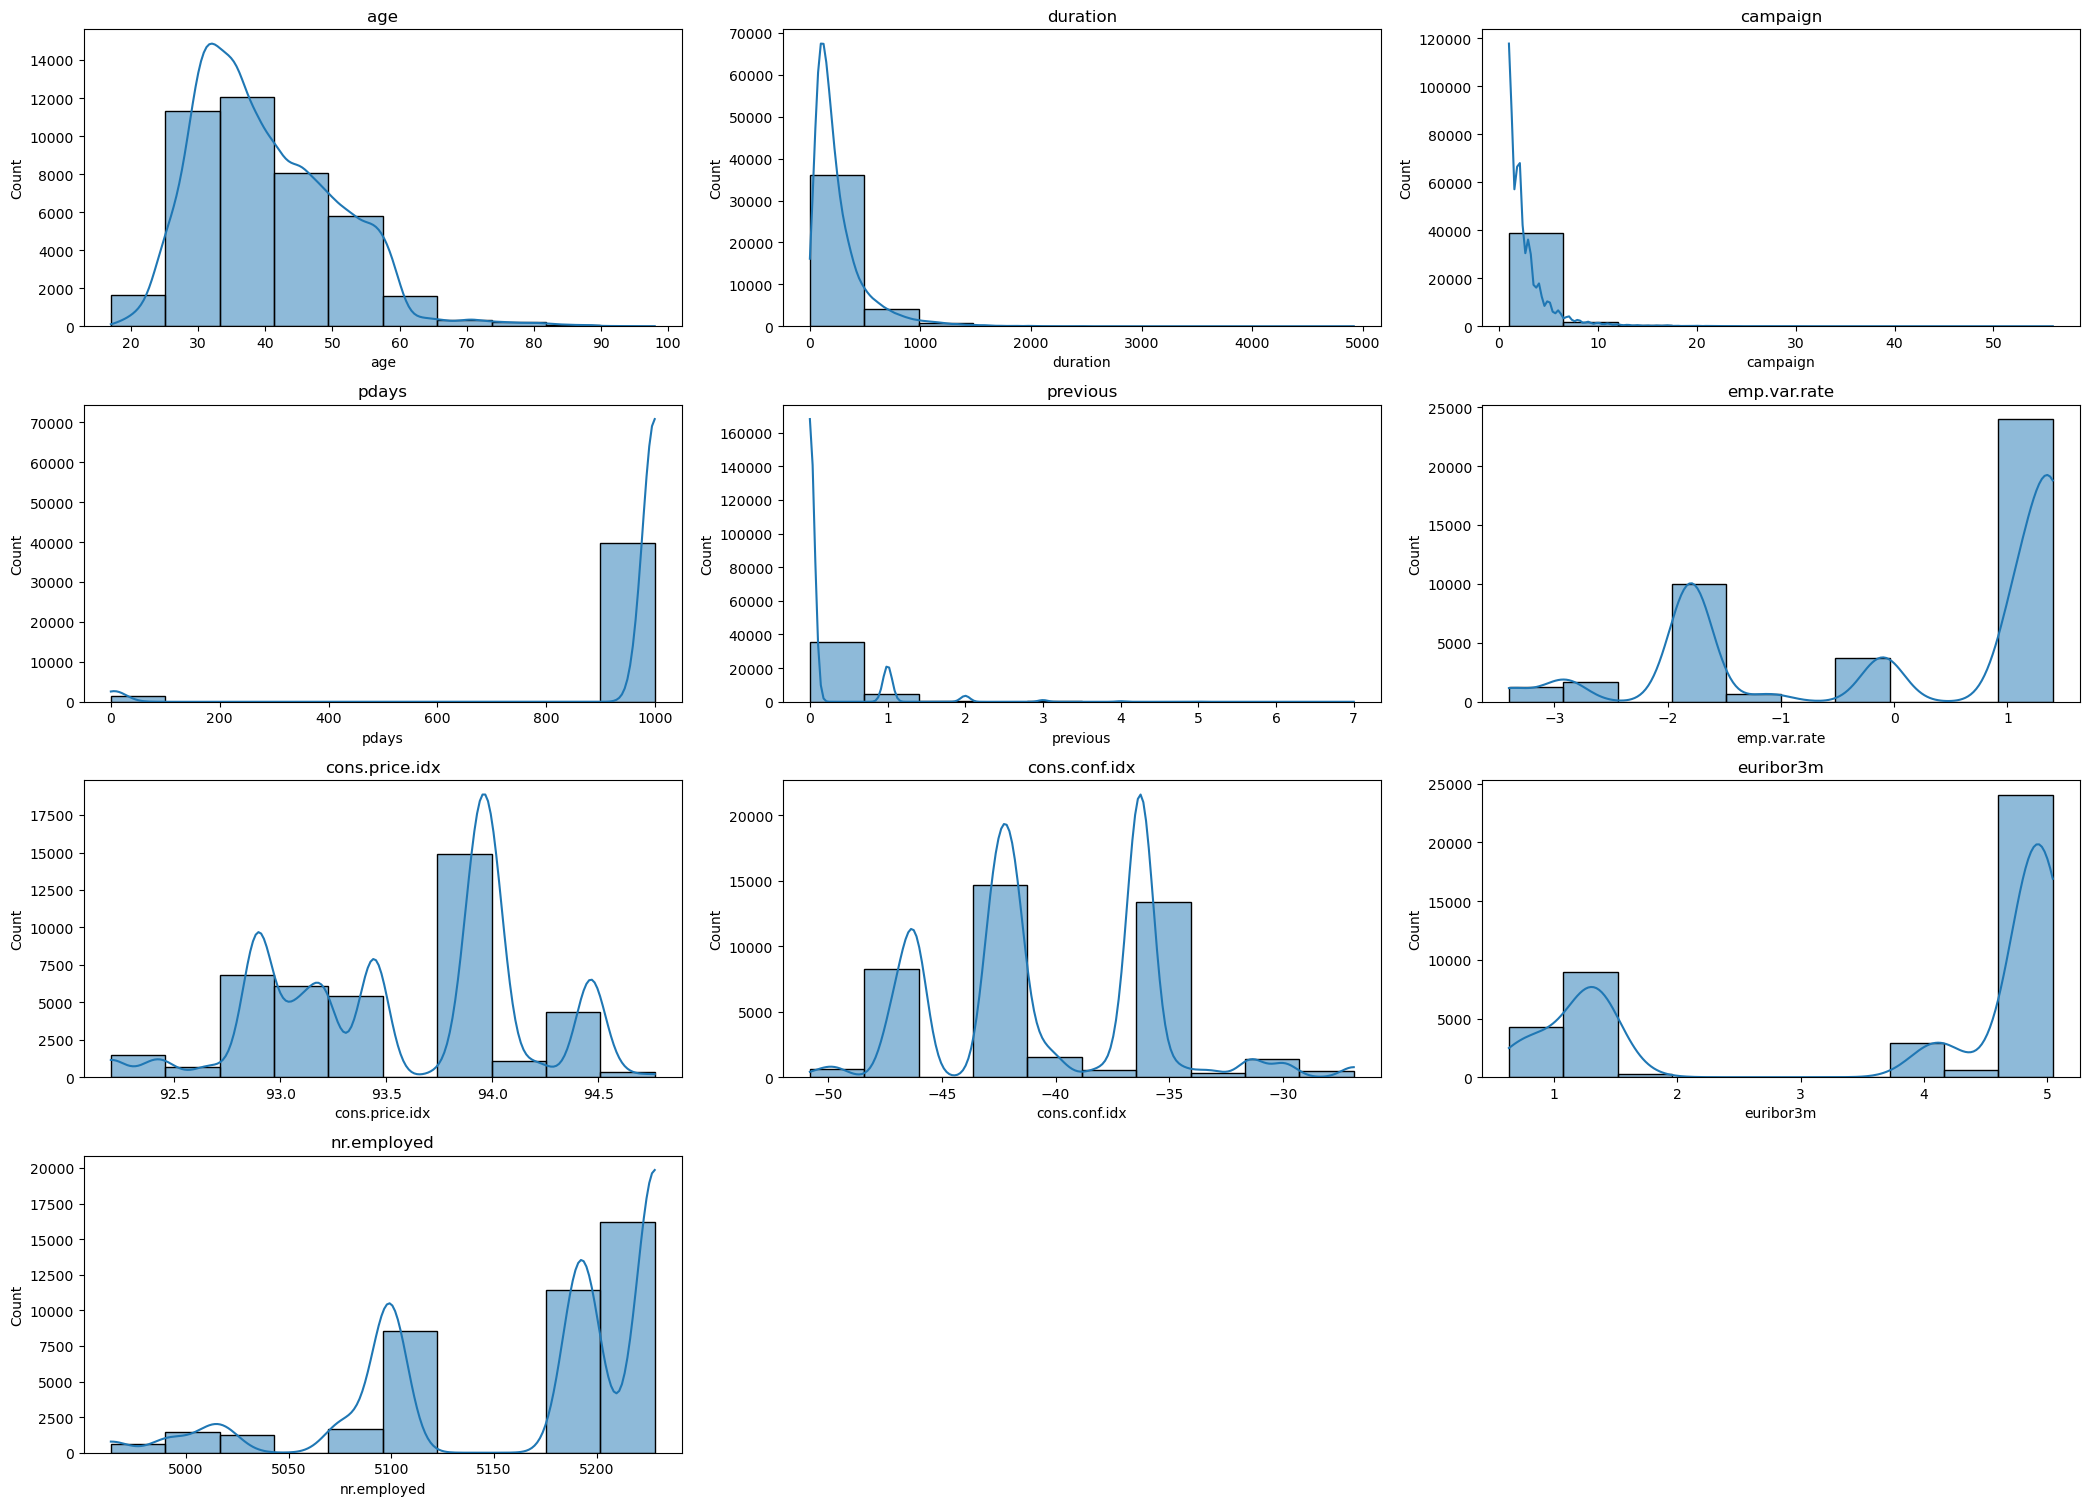

In [8]:
plt.figure(figsize=(21,26))
pos = 1
for i in bank_num_cols:
   plt.subplot(7,3,pos)
   sns.histplot(bank_df[i], bins=10, kde=True)
   pos=pos+1
   plt.title(i)
        
plt.tight_layout()

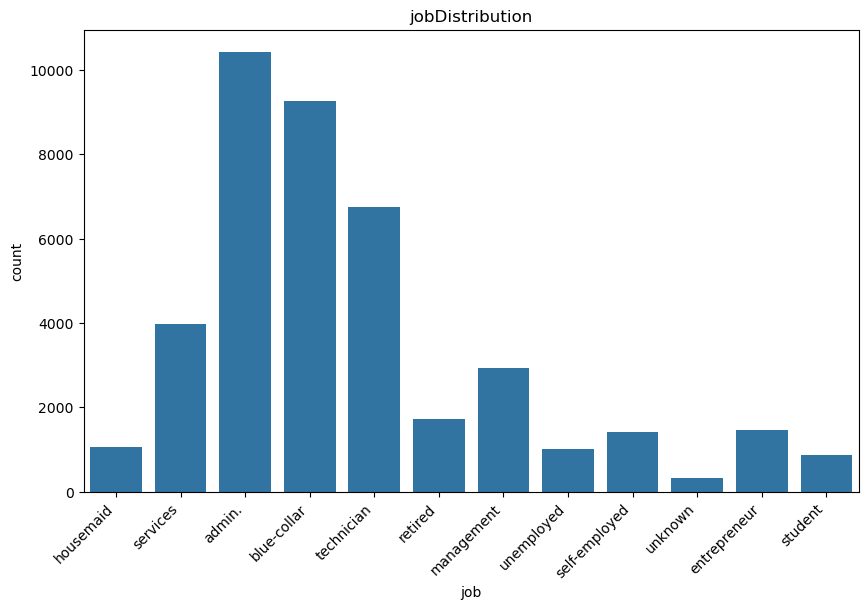

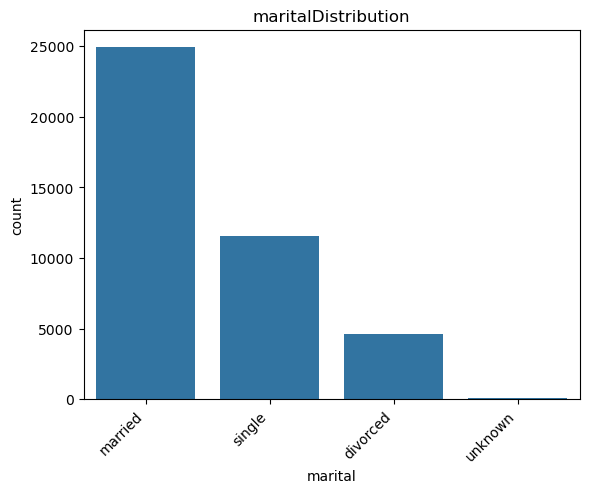

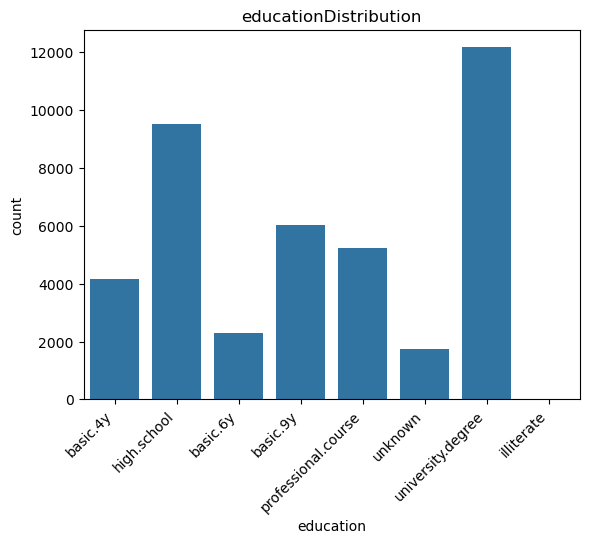

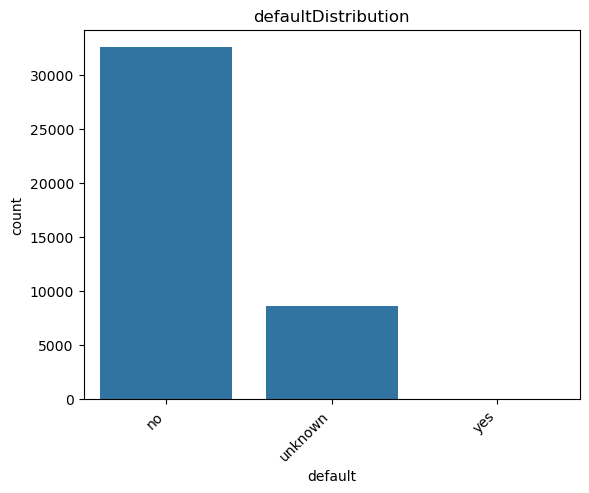

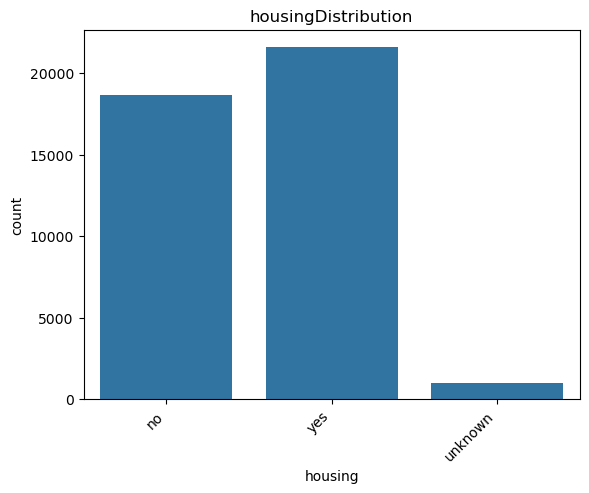

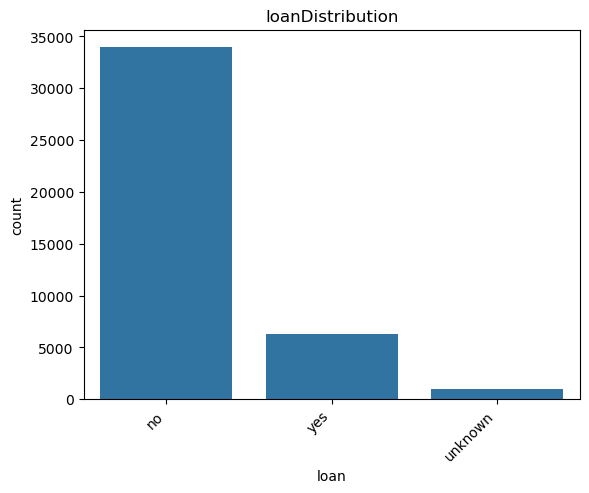

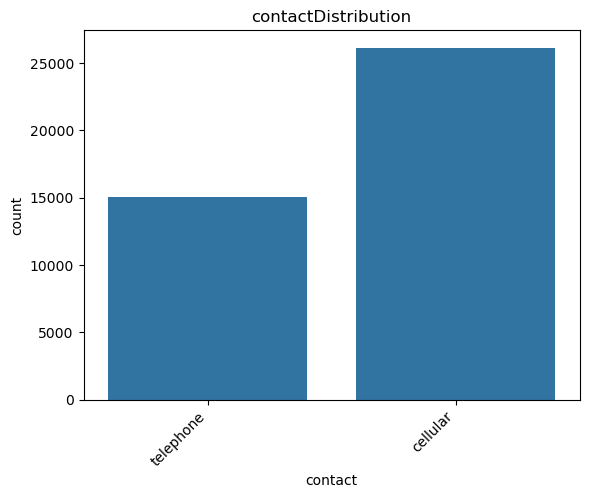

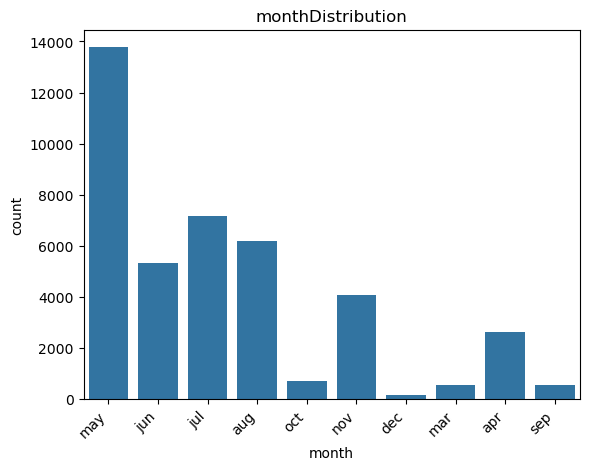

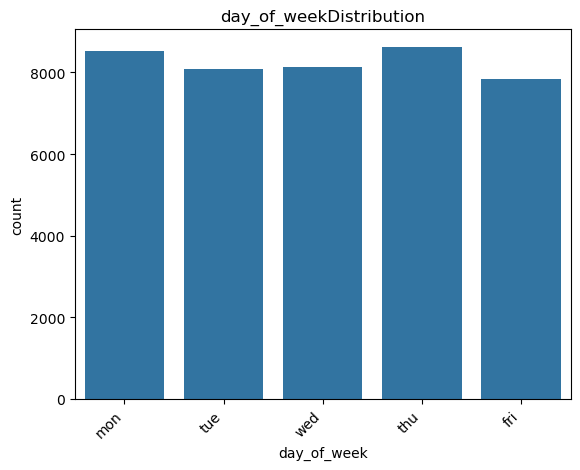

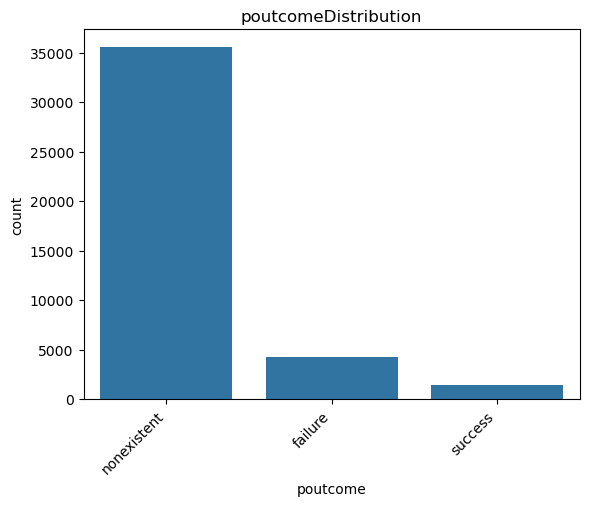

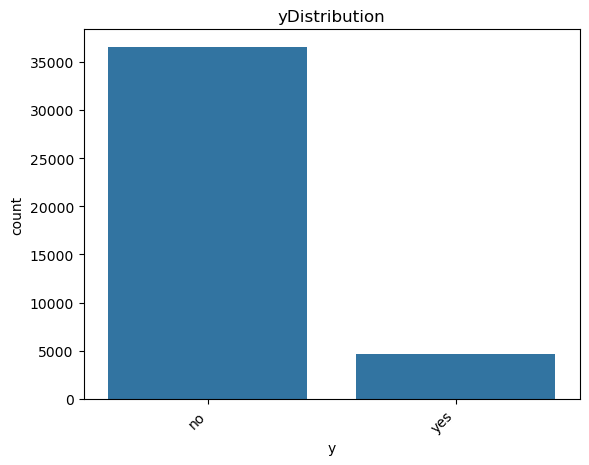

In [9]:
plt.figure(figsize=(10,6))
for i in bank_cat_cols:
    sns.countplot(x=bank_df[i], data=bank_df)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title(i+'Distribution')
    plt.show()

Bivariant Analysis

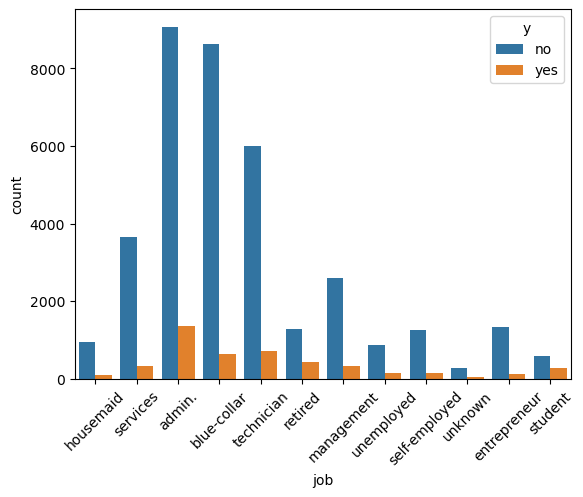

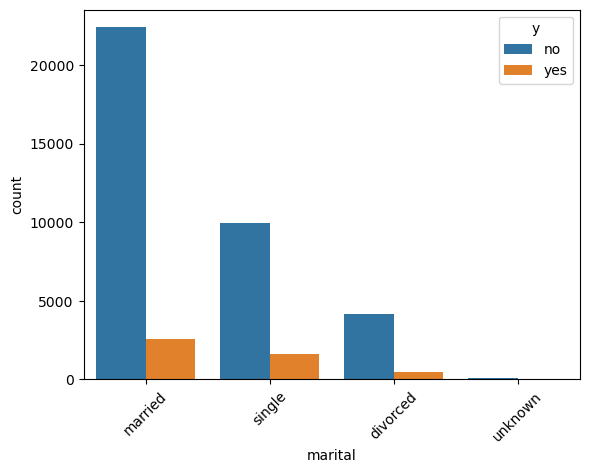

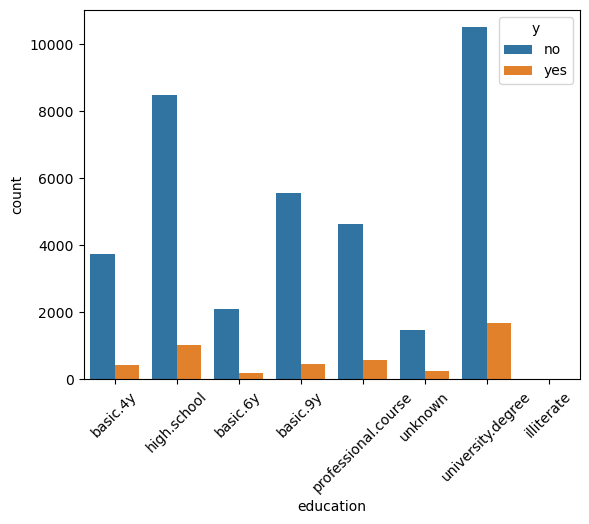

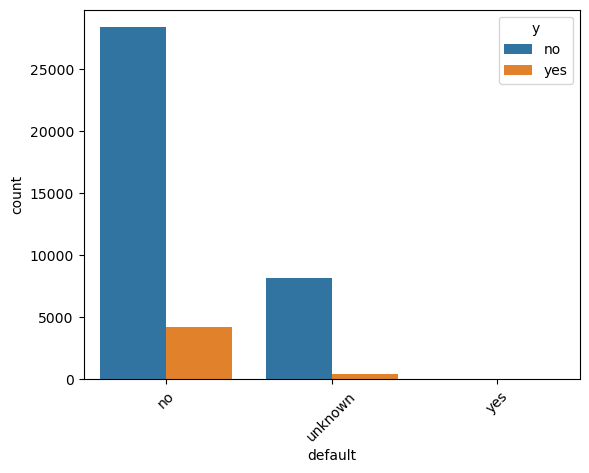

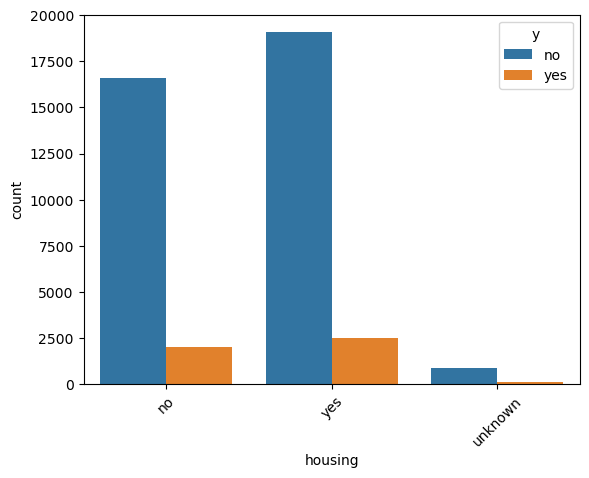

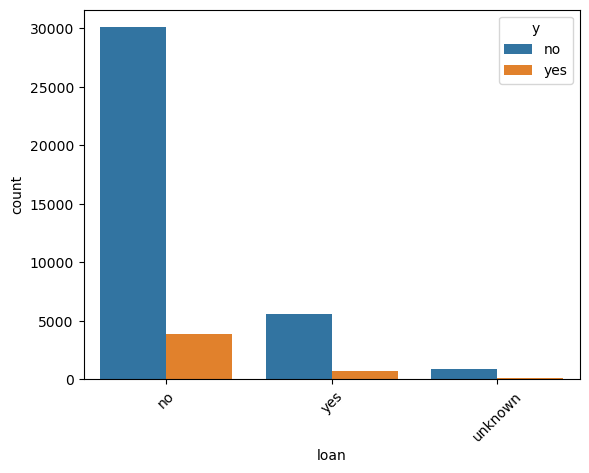

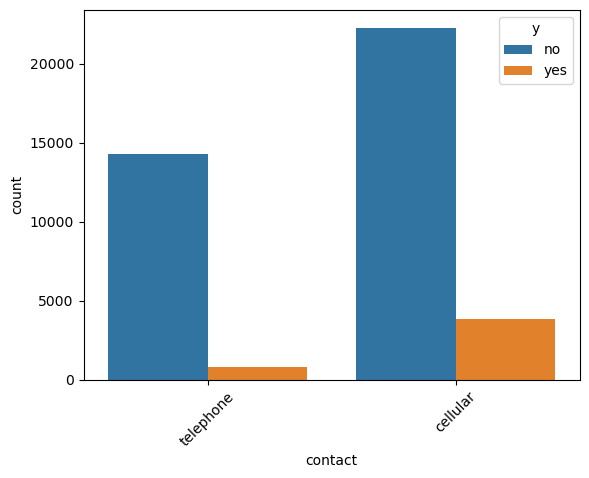

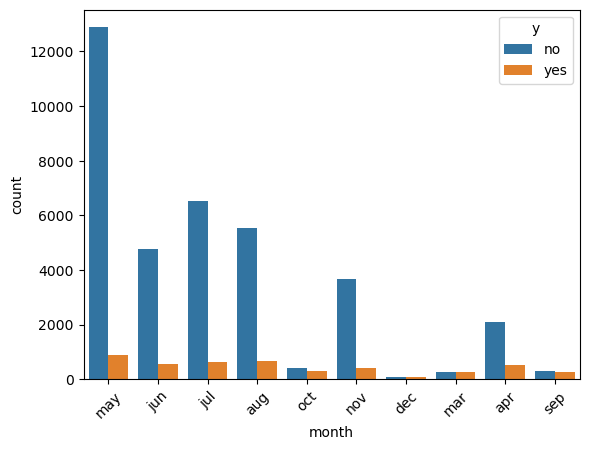

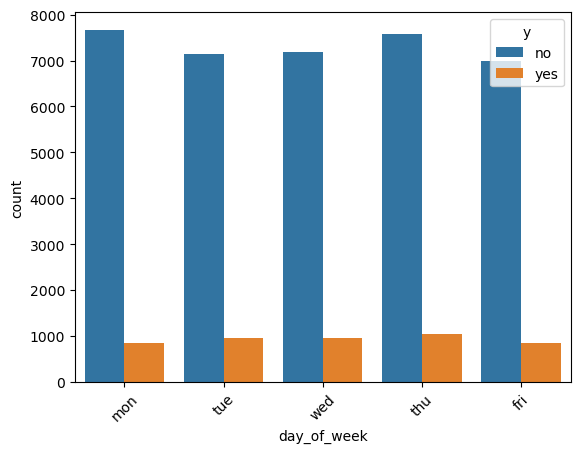

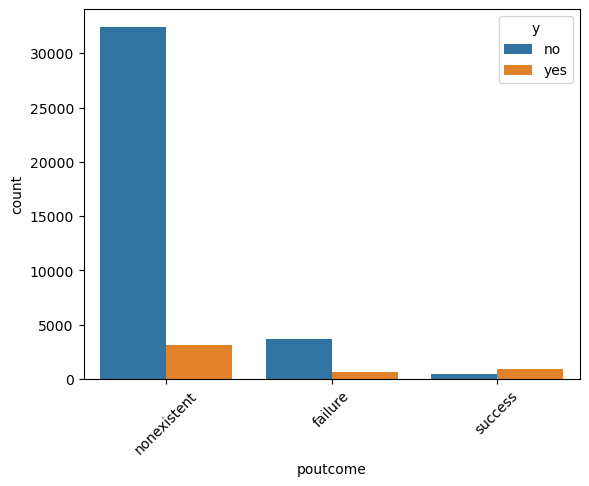

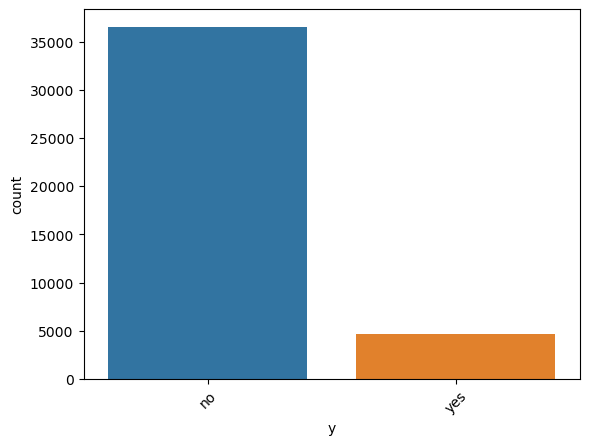

In [10]:
for col in bank_cat_cols:
    sns.countplot(x=col, hue='y', data=bank_df)
    plt.xticks(rotation=45)
    plt.show()


Insights:

- People working in admin jobs are the most likely to subscribe, followed by technicians, blue-collar workers, retired people, management, and students.
  Those in housemaid, unknown, or unemployed categories have much lower subscription rates.

- Married customers tend to subscribe more than those who are single or divorced.

- Clients with a university degree show higher subscription rates compared to others.

- People who don’t have credit defaults,have a housing loan, and don’t have a personal loan are more likely to subscribe.

- Customers contacted through cellular (mobile) are more responsive and have higher subscription rates than those contacted through telephone.

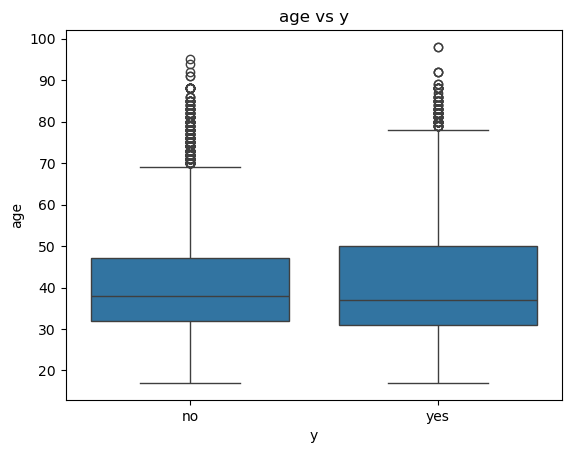

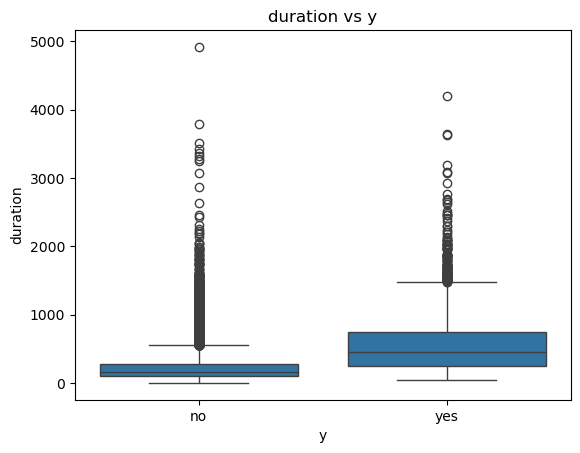

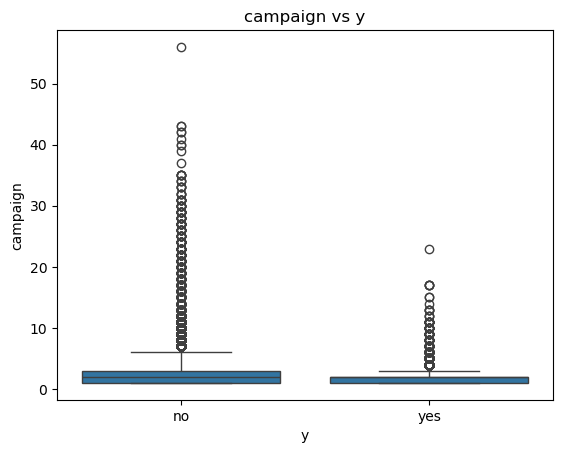

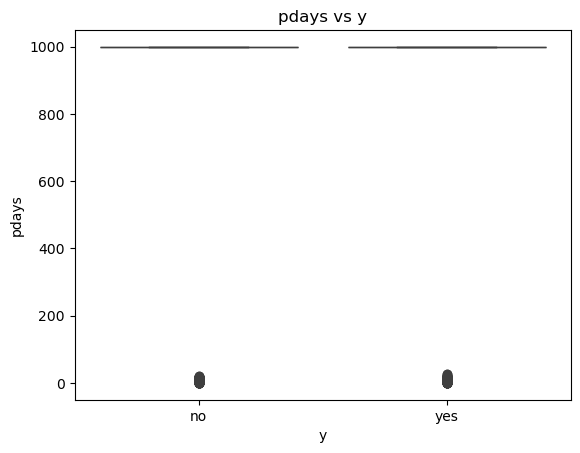

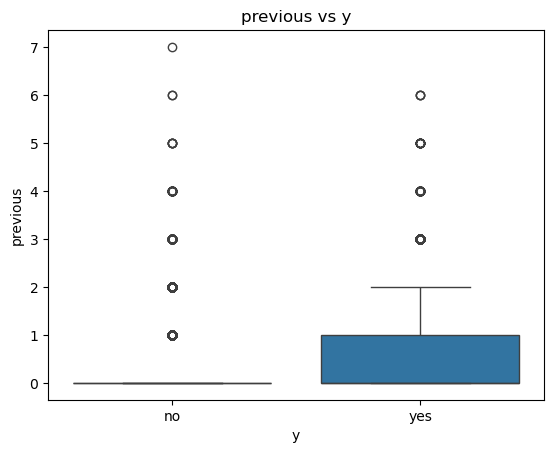

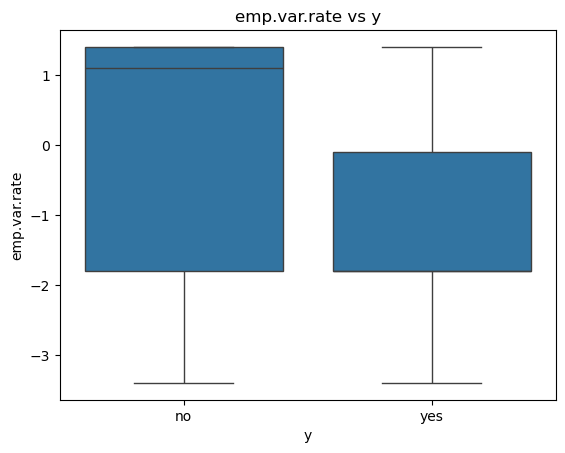

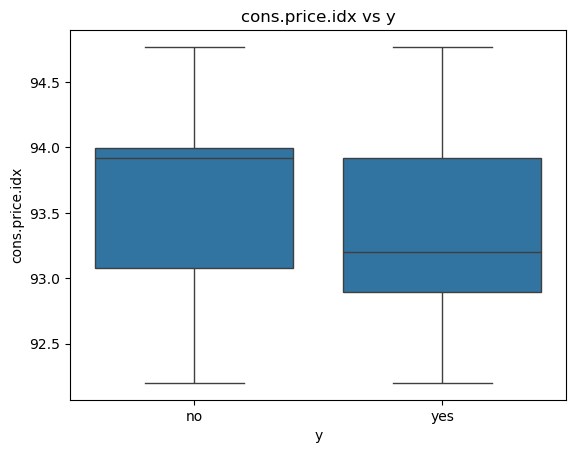

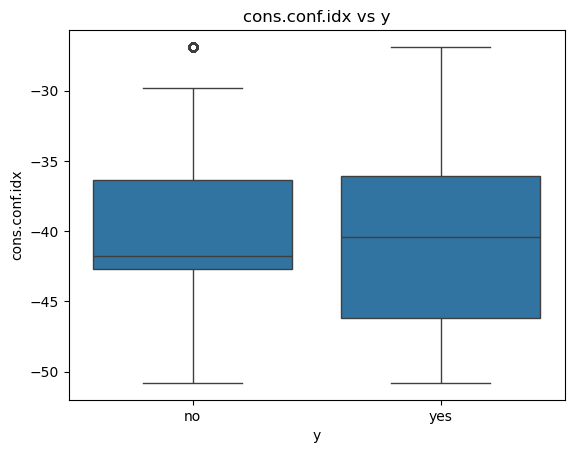

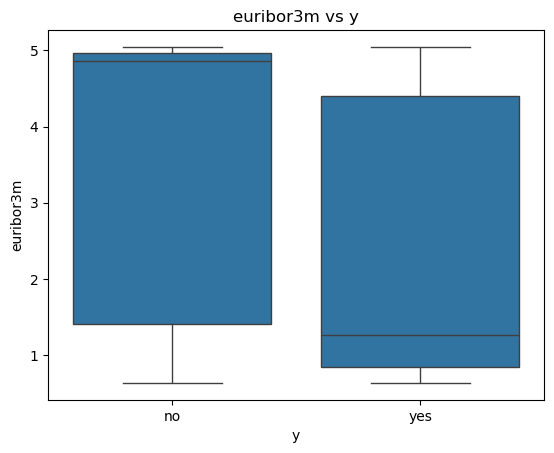

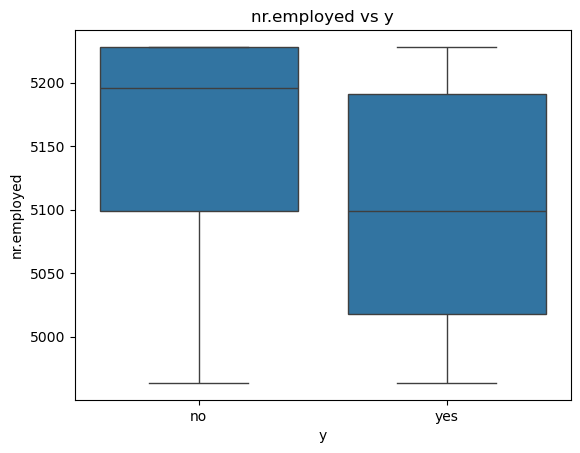

In [11]:
for col in bank_num_cols:
    sns.boxplot(x='y', y=col, data=bank_df)
    plt.title(f'{col} vs y')
    plt.show()


Insights:

- Age distribution seems similar for both group.slightly older clients might subscribe a bit more often.
- As the call duration increases, the likelihood of subscription also increases, indicating that longer conversations tend to convert more successfully.
- But when it come to campaign Many people who said “no” were repeatedly contacted (sometimes 5, 10, 20+ times) — indicating persistent but unsuccessful marketing.Too many contacts seem counterproductive.
- Most of the pdays values are close to zero for both “yes” and “no”, meaning most clients hadn’t been contacted recently.
- Clients who were contacted previously are more likely to subscribe in the current campaign.
- Clients who subscribed mostly fall in periods with lower employment variation rates, while non-subscribers are concentrated around higher rates.
- Clients who subscribed generally had a slightly higher consumer confidence index and Clients who subscribed generally had lower employment numbers compared to non-subscribers.
- Clients who subscribed generally had lower euribor3m values.

Hypothesis testing

In [12]:
# statement1:
# H₀: Call duration does not affect subscription.
# H₁: Call duration does affect subscription.

# statement2:
# H₀: Contact method and subscription are independent.
# H₁: Contact method and subscription are related.
from scipy.stats import ttest_ind
for col in ['duration','campaign']:
    y_yes = bank_df[bank_df['y']== 'yes'][col]
    y_no = bank_df[bank_df['y']== 'no'][col]
    
    t_stat, p_val = ttest_ind(y_yes, y_no)
    print(f" column_name = {col}, T-statistic = {t_stat:.3f}, P-value = {p_val:.5f}")

 column_name = duration, T-statistic = 89.967, P-value = 0.00000
 column_name = campaign, T-statistic = -13.497, P-value = 0.00000


Since the p-value (0.00000) is less than 0.05, we reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁).Therefore, we can conclude that longer call durations are strongly associated with higher subscription rates and when it come to campaign Many people who said “no” were repeatedly contacted.

In [13]:
# statement3:
# H₀: job does not affect subscription.
# H₁: job does affect subscription.

#statement4:
# H₀: Marital status has no impact on subscription.
# H₁: Marital status affects subscription

# statement5:
# H₀: Contact method and subscription are independent.
# H₁: Contact method and subscription are related

from scipy.stats import chi2_contingency
for col in['job','marital','contact']:
    ct = pd.crosstab(bank_df[col], bank_df['y'])
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f" column_name = {col} ,Chi2 = {chi2:.3f}, P-value = {p:.5f}")

 column_name = job ,Chi2 = 961.242, P-value = 0.00000
 column_name = marital ,Chi2 = 122.655, P-value = 0.00000
 column_name = contact ,Chi2 = 862.318, P-value = 0.00000


Since the p-value (0.00000) is less than 0.05, we reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁).

Data Preprocessing & Feature Engineering

In [14]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
bank_df.duplicated().sum()

12

In [16]:
bank_df[bank_df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [17]:
bank_df.drop_duplicates(inplace=True)

In [18]:
bank_df.duplicated().sum()

0

In [19]:
bank_df['pdays'].replace(999, np.nan, inplace=True)

In [20]:
bank_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
bank_df['pdays'].isna().sum()

39661

In [22]:
bank_df['pdays'].fillna(0, inplace=True)

In [23]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


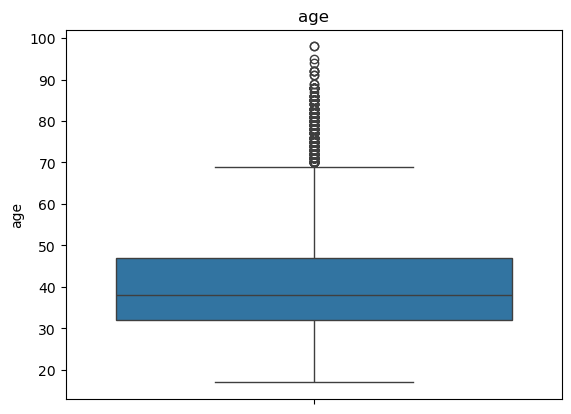

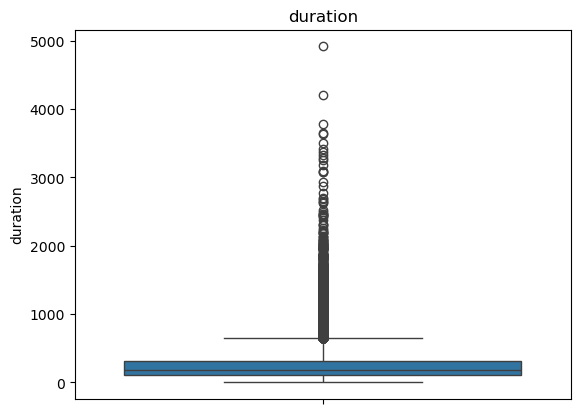

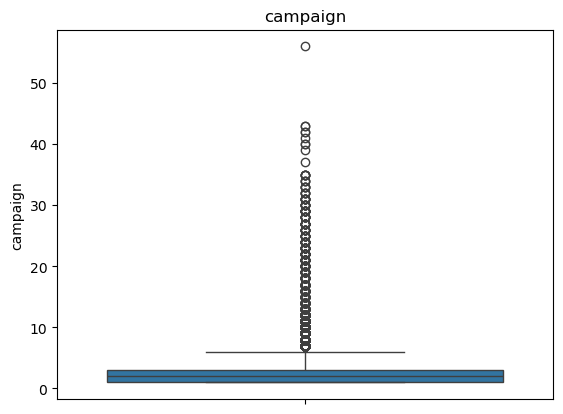

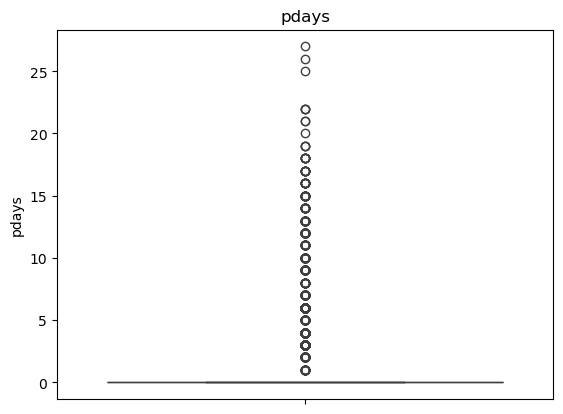

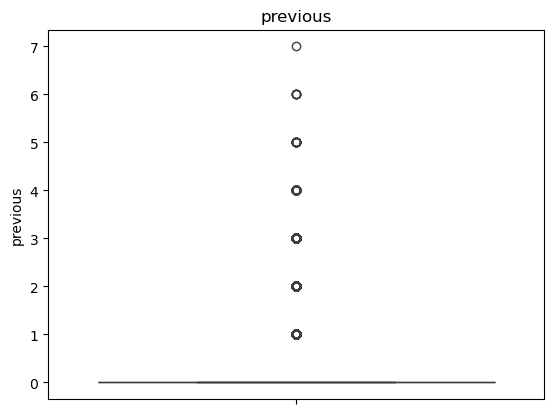

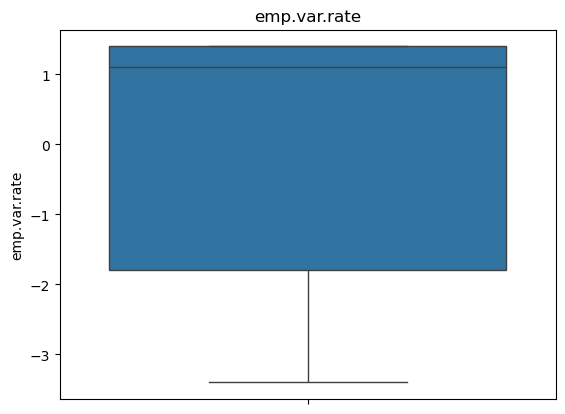

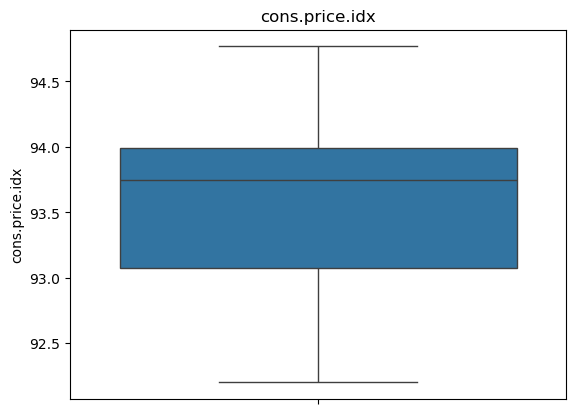

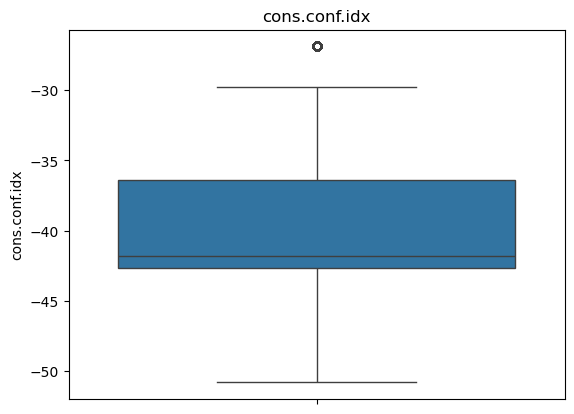

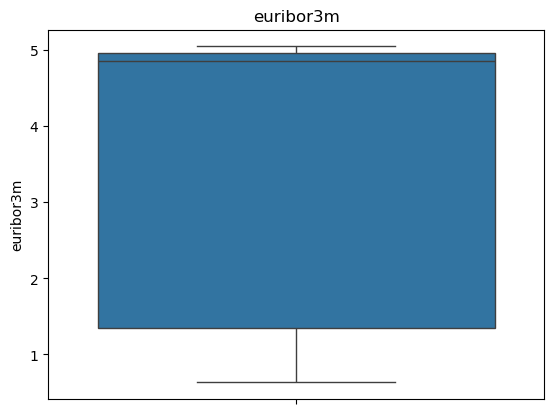

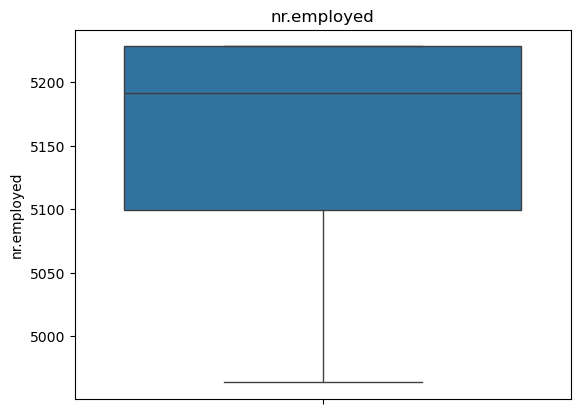

In [24]:
for col in bank_num_cols:
    sns.boxplot(bank_df[col])
    plt.title(col)
    plt.show()

In [25]:
#Handling outliers using IQR
for col in ['age', 'duration', 'campaign', 'pdays']:
    Q1 = bank_df[col].quantile(0.25)
    Q3 = bank_df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    bank_df[col] = np.where(bank_df[col]<lower_bound, lower_bound, np.where(bank_df[col]>upper_bound, upper_bound,bank_df[col]))

In [26]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1.0,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [27]:
bank_df['marital'].value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [28]:
bank_df['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [29]:
bank_df['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [30]:
bank_df['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [31]:
#Encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#As y is a binary column map to transform.
bank_df['y'] = bank_df['y'].map({'yes':1, 'no':0})

#As education seems ordinal column so applying ordinal mapping
education_order = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': 7 
}
bank_df['education_order'] = bank_df['education'].map(education_order)

# # removing education column after mapping
bank_df.drop('education', axis=1, inplace=True)

X = bank_df.drop('y', axis=1)

# Detect categorical and numeric columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

# Applying OneHotEncoder to categorical columns excluding 'y' (target) and 'education' (already ordinally encoded) and scaling to numeric columns.
en = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop'
)

X_encoded = en.fit_transform(X)

In [32]:
bank_df['y'].value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

In [33]:
X_encoded.shape

(41176, 47)

In [34]:
#After encoding and scaling updating to df.
encoded_bank_df = pd.DataFrame(
    X_encoded,
    columns=en.get_feature_names_out()
)

encoded_bank_df.head()

,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,cat__job_retired,cat__job_self-employed,cat__job_services,cat__job_student,cat__job_technician,cat__job_unemployed,...,num__duration,num__campaign,num__pdays,num__previous,num__emp.var.rate,num__cons.price.idx,num__cons.conf.idx,num__euribor3m,num__nr.employed,num__education_order
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.146471,-0.822576,0.0,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,-1.926854
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.485000,-0.822576,0.0,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,-0.164510
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.050864,-0.822576,0.0,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,-0.164510
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.473724,-0.822576,0.0,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,-1.339406
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.405826,-0.822576,0.0,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,-0.164510


Feature Selection

In [35]:
encoded_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cat__job_blue-collar       41176 non-null  float64
 1   cat__job_entrepreneur      41176 non-null  float64
 2   cat__job_housemaid         41176 non-null  float64
 3   cat__job_management        41176 non-null  float64
 4   cat__job_retired           41176 non-null  float64
 5   cat__job_self-employed     41176 non-null  float64
 6   cat__job_services          41176 non-null  float64
 7   cat__job_student           41176 non-null  float64
 8   cat__job_technician        41176 non-null  float64
 9   cat__job_unemployed        41176 non-null  float64
 10  cat__job_unknown           41176 non-null  float64
 11  cat__marital_married       41176 non-null  float64
 12  cat__marital_single        41176 non-null  float64
 13  cat__marital_unknown       41176 non-null  flo

In [36]:
# Correlation is calculated only for original numeric features to prevent a large, cluttered matrix from the many encoded columns.
num_cols = ['num__age', 'num__duration', 'num__campaign','num__pdays', 'num__previous', 'num__emp.var.rate', 'num__cons.price.idx',
            'num__cons.conf.idx', 'num__euribor3m','num__nr.employed', 'num__education_order']
corr_ms = encoded_bank_df[num_cols].corr()
corr_ms

,num__age,num__duration,num__campaign,num__pdays,num__previous,num__emp.var.rate,num__cons.price.idx,num__cons.conf.idx,num__euribor3m,num__nr.employed,num__education_order
num__age,1.000000,0.001993,0.003337,NaN,0.015744,0.012335,0.006923,0.126561,0.024153,-0.002228,-0.135390
num__duration,0.001993,1.000000,-0.080158,NaN,0.037376,-0.044965,0.001459,-0.006560,-0.052405,-0.068737,-0.016788
num__campaign,0.003337,-0.080158,1.000000,NaN,-0.083840,0.148617,0.114822,-0.018885,0.129392,0.142535,0.002111
num__pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__previous,0.015744,0.037376,-0.083840,NaN,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411,0.040959
num__emp.var.rate,0.012335,-0.044965,0.148617,NaN,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949,-0.046516
num__cons.price.idx,0.006923,0.001459,0.114822,NaN,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945,-0.079886
num__cons.conf.idx,0.126561,-0.006560,-0.018885,NaN,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679,0.069540
num__euribor3m,0.024153,-0.052405,0.129392,NaN,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146,-0.039483
num__nr.employed,-0.002228,-0.068737,0.142535,NaN,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000,-0.043642


In [37]:
corr_ms[corr_ms >0.9]

,num__age,num__duration,num__campaign,num__pdays,num__previous,num__emp.var.rate,num__cons.price.idx,num__cons.conf.idx,num__euribor3m,num__nr.employed,num__education_order
num__age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
num__emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.972244,0.906949,NaN
num__cons.price.idx,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
num__cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
num__euribor3m,NaN,NaN,NaN,NaN,NaN,0.972244,NaN,NaN,1.000000,0.945146,NaN
num__nr.employed,NaN,NaN,NaN,NaN,NaN,0.906949,NaN,NaN,0.945146,1.000000,NaN


Insights:
- Observed muticolinarity with:
     - num__emp.var.rate & num__euribor3m --> 0.97 (very high)
     - num__nr.employed & num__euribor3m  --> 0.94 (high)
     - num__emp.var.rate & num__nr.employed --> 0.90 (high)
- In order to deal with multicolinerarity using VIF.
- VIF (Variance Inflation Factor) measures how much a variable is linearly correlated with the others.

In [38]:
num = encoded_bank_df[num_cols]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame({"Feature" : num.columns,
                       "VIF" : [variance_inflation_factor(num.values, i) for i in range(num.shape[1])]
                       })

print(vif_df.sort_values("VIF", ascending = False))

                 Feature        VIF
8         num__euribor3m  64.513602
5      num__emp.var.rate  33.224815
9       num__nr.employed  31.659344
6    num__cons.price.idx   6.332097
7     num__cons.conf.idx   2.621251
4          num__previous   1.350687
2          num__campaign   1.041625
0               num__age   1.039693
10  num__education_order   1.037639
1          num__duration   1.012634
3             num__pdays        NaN


Observations:

- num__euribor3m  ,num__emp.var.rate and num__nr.employed showing Strong multicollinearity
- num__cons.price.idx is moderate.

In [39]:
# The features 'emp.var.rate', 'euribor3m', and 'nr.employed' show high multicollinearity (VIF > 30)
# Instead of dropping, combined them into a single feature 'economic_range' 
# to capture the overall economic condition while reducing redundancy.
encoded_bank_df['economic_range'] = (encoded_bank_df['num__euribor3m']+encoded_bank_df['num__emp.var.rate']+encoded_bank_df['num__nr.employed'])/3
encoded_bank_df.drop(['num__euribor3m', 'num__emp.var.rate', 'num__nr.employed' ], axis =1 , inplace =True)

In [40]:
#Verifying correlation with updated new column.
updated_num_cols = ['num__age', 'num__duration', 'num__campaign','num__pdays', 'num__previous', 'num__cons.price.idx',
            'num__cons.conf.idx','num__education_order','economic_range']
x_corr_ms = encoded_bank_df[updated_num_cols].corr()
x_corr_ms

,num__age,num__duration,num__campaign,num__pdays,num__previous,num__cons.price.idx,num__cons.conf.idx,num__education_order,economic_range
num__age,1.000000,0.001993,0.003337,NaN,0.015744,0.006923,0.126561,-0.135390,0.011650
num__duration,0.001993,1.000000,-0.080158,NaN,0.037376,0.001459,-0.006560,-0.016788,-0.056482
num__campaign,0.003337,-0.080158,1.000000,NaN,-0.083840,0.114822,-0.018885,0.002111,0.143000
num__pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__previous,0.015744,0.037376,-0.083840,NaN,1.000000,-0.203197,-0.050929,0.040959,-0.468083
num__cons.price.idx,0.006923,0.001459,0.114822,NaN,-0.203197,1.000000,0.059170,-0.079886,0.675114
num__cons.conf.idx,0.126561,-0.006560,-0.018885,NaN,-0.050929,0.059170,1.000000,0.069540,0.195453
num__education_order,-0.135390,-0.016788,0.002111,NaN,0.040959,-0.079886,0.069540,1.000000,-0.044083
economic_range,0.011650,-0.056482,0.143000,NaN,-0.468083,0.675114,0.195453,-0.044083,1.000000


In [41]:
x_corr_ms[x_corr_ms>0.9]

,num__age,num__duration,num__campaign,num__pdays,num__previous,num__cons.price.idx,num__cons.conf.idx,num__education_order,economic_range
num__age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
num__pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
num__cons.price.idx,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
num__cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
num__education_order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
economic_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [42]:
x_corr_ms[x_corr_ms>0.8]

,num__age,num__duration,num__campaign,num__pdays,num__previous,num__cons.price.idx,num__cons.conf.idx,num__education_order,economic_range
num__age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
num__pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num__previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
num__cons.price.idx,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
num__cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
num__education_order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
economic_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [43]:
encoded_bank_df.head(5)

,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,cat__job_retired,cat__job_self-employed,cat__job_services,cat__job_student,cat__job_technician,cat__job_unemployed,...,cat__poutcome_success,num__age,num__duration,num__campaign,num__pdays,num__previous,num__cons.price.idx,num__cons.conf.idx,num__education_order,economic_range
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.585672,0.146471,-0.822576,0.0,-0.349551,0.722628,0.886568,-1.926854,0.564086
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.684402,-0.485000,-0.822576,0.0,-0.349551,0.722628,0.886568,-0.164510,0.564086
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.290190,-0.050864,-0.822576,0.0,-0.349551,0.722628,0.886568,-0.164510,0.564086
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.005999,-0.473724,-0.822576,0.0,-0.349551,0.722628,0.886568,-1.339406,0.564086
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.585672,0.405826,-0.822576,0.0,-0.349551,0.722628,0.886568,-0.164510,0.564086


In [44]:
y_set = bank_df['y']
x_set = encoded_bank_df

In [45]:
bank_df['y'].value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

Observed imbalancing of data in target column.

In [46]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x_train, x_test, y_train, y_test =  train_test_split(x_set,y_set, train_size=0.75, random_state=42, stratify=y_set)

sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

# Step 3: Check new balance
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_resampled.value_counts().to_dict())

Before SMOTE: {0: 27403, 1: 3479}
After SMOTE: {0: 27403, 1: 27403}


  File "C:\Users\Silpa Suresh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Silpa Suresh\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Silpa Suresh\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Silpa Suresh\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Model Building

1. Logistic Regression


In [47]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred_lr = model.predict(x_test)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

[[8879  255]
 [ 714  446]]
              precision    recall  f1-score   support

           0      0.926     0.972     0.948      9134
           1      0.636     0.384     0.479      1160

    accuracy                          0.906     10294
   macro avg      0.781     0.678     0.714     10294
weighted avg      0.893     0.906     0.895     10294

ROC-AUC Score: 0.9352942397861721


In [49]:
#with class_weight
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train, y_train)
y_pred_lr_cw = model.predict(x_test)

print(confusion_matrix(y_test, y_pred_lr_cw))
print(classification_report(y_test, y_pred_lr_cw, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

[[7750 1384]
 [ 100 1060]]
              precision    recall  f1-score   support

           0      0.987     0.848     0.913      9134
           1      0.434     0.914     0.588      1160

    accuracy                          0.856     10294
   macro avg      0.710     0.881     0.750     10294
weighted avg      0.925     0.856     0.876     10294

ROC-AUC Score: 0.9357776552932205


In [50]:
#After SMOTE
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(x_train_resampled, y_train_resampled)
y_pred_lr_after = model.predict(x_test)

print(confusion_matrix(y_test, y_pred_lr_after))
print(classification_report(y_test, y_pred_lr_after, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

[[7803 1331]
 [ 118 1042]]
              precision    recall  f1-score   support

           0      0.985     0.854     0.915      9134
           1      0.439     0.898     0.590      1160

    accuracy                          0.859     10294
   macro avg      0.712     0.876     0.752     10294
weighted avg      0.924     0.859     0.878     10294

ROC-AUC Score: 0.9352377060320288


Text(0.5, 1.0, 'Confusion Matrix - After SMOTE')

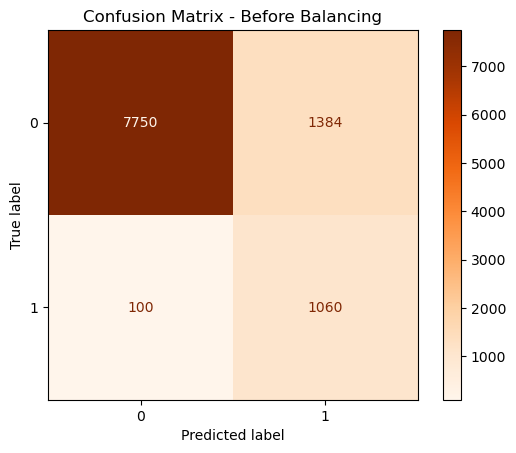

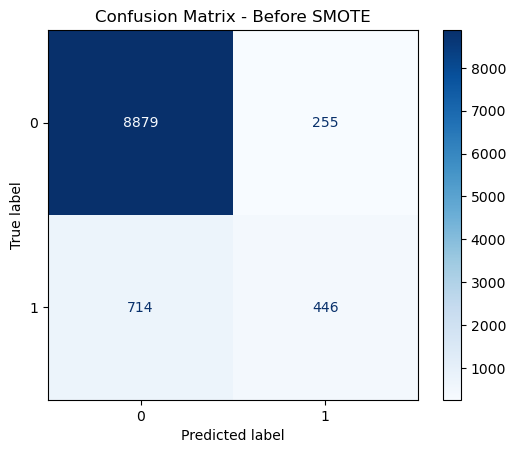

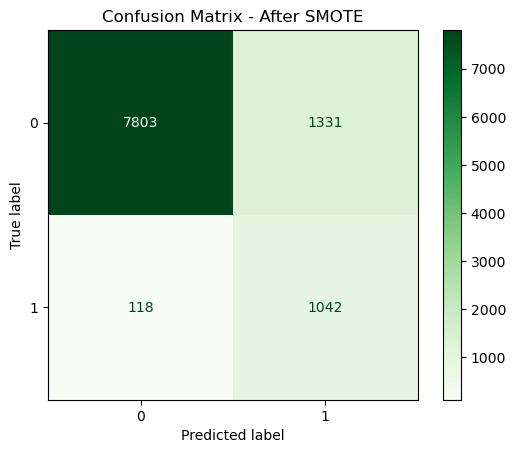

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_cw, cmap='Oranges')
plt.title("Confusion Matrix - Before Balancing")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues')
plt.title("Confusion Matrix - Before SMOTE")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_after, cmap='Greens')
plt.title("Confusion Matrix - After SMOTE")

- The unbalanced model performs well in accuracy but fails to capture many potential subscribers, limiting marketing reach.
- The SMOTE + class weight model achieved a better F1-score and accuracy, indicating a more balanced trade-off between precision and recall.
- The class weight–only model showed higher recall, making it ideal when the goal is to identify as many potential subscribers as possible.
- Overall, the SMOTE + class weight model performs more consistently and would generalize better for real-world predictions.

RandomForest Classification

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(x_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

[[8633  501]
 [ 504  656]]
              precision    recall  f1-score   support

           0      0.945     0.945     0.945      9134
           1      0.567     0.566     0.566      1160

    accuracy                          0.902     10294
   macro avg      0.756     0.755     0.756     10294
weighted avg      0.902     0.902     0.902     10294

ROC-AUC Score: 0.9400156104890406


In [53]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)
xgb_model.fit(x_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(x_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1]))

[[8679  455]
 [ 493  667]]
              precision    recall  f1-score   support

           0      0.946     0.950     0.948      9134
           1      0.594     0.575     0.585      1160

    accuracy                          0.908     10294
   macro avg      0.770     0.763     0.766     10294
weighted avg      0.907     0.908     0.907     10294

ROC-AUC Score: 0.944537933299608


In [54]:
# LightGBM model
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31
)

lgb_model.fit(x_train_resampled, y_train_resampled)
y_pred_lgb = lgb_model.predict(x_test)
y_prob_lgb = lgb_model.predict_proba(x_test)[:, 1]

# Evaluate
print("LightGBM Results")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lgb))

[LightGBM] [Info] Number of positive: 27403, number of negative: 27403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10422
[LightGBM] [Info] Number of data points in the train set: 54806, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Results
[[8599  535]
 [ 409  751]]
              precision    recall  f1-score   support

           0      0.955     0.941     0.948      9134
           1      0.584     0.647     0.614      1160

    accuracy                          0.908     10294
   macro avg      0.769     0.794     0.781     10294
weighted avg      0.913     0.908     0.910     10294

ROC-AUC Score: 0.9473411675211223


In [55]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(
    random_state=42,
    iterations=300,
    learning_rate=0.05,
    depth=8,
    eval_metric='AUC',
    verbose=0
)
cat_model.fit(x_train_resampled, y_train_resampled)
y_pred_cat = cat_model.predict(x_test)
y_prob_cat = cat_model.predict_proba(x_test)[:, 1]

# Evaluate
print("CatBoost Results")
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_cat))

CatBoost Results
[[8650  484]
 [ 432  728]]
              precision    recall  f1-score   support

           0      0.952     0.947     0.950      9134
           1      0.601     0.628     0.614      1160

    accuracy                          0.911     10294
   macro avg      0.777     0.787     0.782     10294
weighted avg      0.913     0.911     0.912     10294

ROC-AUC Score: 0.94786714850917


HyperpParameter Tunning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Logistic Regression
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 2, 8),
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=3000, random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train_resampled, y_train_resampled)

print("Best Parameters:", grid.best_params_) 
best_lr = grid.best_estimator_

# Evaluate
y_pred = best_lr.predict(x_test)
y_prob = best_lr.predict_proba(x_test)[:, 1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'C': 0.02682695795279726, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}

Confusion Matrix:
 [[7801 1333]
 [ 113 1047]]

Classification Report:
               precision    recall  f1-score   support

           0      0.986     0.854     0.915      9134
           1      0.440     0.903     0.592      1160

    accuracy                          0.860     10294
   macro avg      0.713     0.878     0.753     10294
weighted avg      0.924     0.860     0.879     10294

ROC-AUC Score: 0.9353680451212975


In [70]:
#RandonForestClassification
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint 

rf = RandomForestClassifier(random_state=42) 
param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}
rand_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,         # tries 30 random combos
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rand_rf.fit(x_train_resampled, y_train_resampled)
print("Best Params:", rand_rf.best_params_)
best_rf = rand_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(x_test)
y_prob_rf_tuned = best_rf.predict_proba(x_test)[:, 1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf_tuned))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Params: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 256}

Confusion Matrix:
 [[8656  478]
 [ 503  657]]

Classification Report:
               precision    recall  f1-score   support

           0      0.945     0.948     0.946      9134
           1      0.579     0.566     0.573      1160

    accuracy                          0.905     10294
   macro avg      0.762     0.757     0.759     10294
weighted avg      0.904     0.905     0.904     10294

ROC-AUC Score: 0.9409176494793985


In [64]:
#XGBoost Classification
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

xgb_base = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False,
    tree_method='hist'  
)

param_dist = {
    'n_estimators': randint(200, 800),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.19),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 8),
    'gamma': uniform(0.0, 0.5),
    'reg_alpha': uniform(0.0, 0.3),
    'reg_lambda': uniform(0.7, 0.6)
}

xgb_rand = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=40,            
    scoring='f1',         
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_rand.fit(x_train_resampled, y_train_resampled)

print("Best Params:", xgb_rand.best_params_)
best_xgb = xgb_rand.best_estimator_

y_pred_xgb_tuned = best_xgb.predict(x_test)
y_prob_xgb_tuned = best_xgb.predict_proba(x_test)[:, 1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_tuned, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb_tuned))


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Params: {'colsample_bytree': 0.908897907718663, 'gamma': 0.0993578407670862, 'learning_rate': 0.011049202253484457, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 792, 'reg_alpha': 0.21340258582459498, 'reg_lambda': 1.1741053243187234, 'subsample': 0.8423839899124046}

Confusion Matrix:
 [[8385  749]
 [ 278  882]]

Classification Report:
               precision    recall  f1-score   support

           0      0.968     0.918     0.942      9134
           1      0.541     0.760     0.632      1160

    accuracy                          0.900     10294
   macro avg      0.754     0.839     0.787     10294
weighted avg      0.920     0.900     0.907     10294

ROC-AUC Score: 0.9451148796085861


In [65]:
#LGBM
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

lgb_base = LGBMClassifier(
    random_state=42,
    boosting_type='gbdt',
    objective='binary'
)

param_dist = {
    'n_estimators': randint(200, 800),
    'learning_rate': uniform(0.01, 0.19),     
    'num_leaves': randint(16, 128),          
    'max_depth': randint(-1, 16),             
    'min_child_samples': randint(10, 200),    
    'subsample': uniform(0.6, 0.4),           
    'colsample_bytree': uniform(0.6, 0.4),    
    'reg_alpha': uniform(0.0, 0.3),           
    'reg_lambda': uniform(0.7, 0.6),          
    'class_weight': [None, 'balanced']
}

lgb_rand = RandomizedSearchCV(
    estimator=lgb_base,
    param_distributions=param_dist,
    n_iter=20,            
    scoring='f1',         
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

lgb_rand.fit(x_train_resampled, y_train_resampled)

print("Best Params:", lgb_rand.best_params_)
best_lgb = lgb_rand.best_estimator_

y_pred_lgb_tuned = best_lgb.predict(x_test)
y_prob_lgb_tuned = best_lgb.predict_proba(x_test)[:, 1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb_tuned, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lgb_tuned))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 27403, number of negative: 27403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10422
[LightGBM] [Info] Number of data points in the train set: 54806, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Params: {'class_weight': 'balanced', 'colsample_bytree': 0.7541666010159664, 'learning_rate': 0.013033587921840697, 'max_depth': 0, 'min_child_samples': 93, 'n_estimators': 291, 'num_leaves': 126, 'reg_alpha': 0.20497905564763746, 'reg_lambda': 1.0659979946695726, 'subsample': 0.9332779646944658}

Confusion Matrix:
 [[8467  667]
 [ 309  851]]

Classification Report:
               precision    recall  f1-score   support

           0      0.965     0.927     0.946      9134
           1   

Hyperparameter tuning for CatBoost was explored using RandomizedSearchCV and early stopping, but due to time and computational constraints, the final model used a set of empirically optimized parameters (depth=8, learning_rate=0.05, l2_leaf_reg=3, etc.), which provided strong performance with efficient training.”

In [86]:
#CatBoostClassification
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

best_cat = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    iterations=1000,             
    bootstrap_type='Bayesian',
    bagging_temperature=0.5,
    random_strength=0.5,
    border_count=128,
    od_type='Iter',
    od_wait=400,
    use_best_model=True,
    thread_count=4,
    random_seed=42,
    verbose=100
)

best_cat.fit(x_train_resampled, y_train_resampled, eval_set=(x_test, y_test))

y_pred_cat_tuned = best_cat.predict(x_test)
y_prob_cat_tuned = best_cat.predict_proba(x_test)[:, 1]


print("CatBoost Results")
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat_tuned, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_cat_tuned))


0:	test: 0.9326819	best: 0.9326819 (0)	total: 25.2ms	remaining: 25.1s
100:	test: 0.9468017	best: 0.9468502 (99)	total: 1.79s	remaining: 16s
200:	test: 0.9473200	best: 0.9474907 (188)	total: 3.65s	remaining: 14.5s
300:	test: 0.9476256	best: 0.9478442 (277)	total: 7.35s	remaining: 17.1s
400:	test: 0.9478286	best: 0.9479738 (332)	total: 11.1s	remaining: 16.5s
500:	test: 0.9474964	best: 0.9479738 (332)	total: 15.1s	remaining: 15s
600:	test: 0.9471980	best: 0.9479738 (332)	total: 18.6s	remaining: 12.3s
700:	test: 0.9467965	best: 0.9479738 (332)	total: 22.4s	remaining: 9.54s
Stopped by overfitting detector  (400 iterations wait)

bestTest = 0.9479738454
bestIteration = 332

Shrink model to first 333 iterations.
CatBoost Results
[[8650  484]
 [ 432  728]]
              precision    recall  f1-score   support

           0      0.952     0.948     0.950      9134
           1      0.603     0.624     0.613      1160

    accuracy                          0.911     10294
   macro avg      0.777

In [87]:
cat_default = CatBoostClassifier(
    learning_rate=0.05, depth=8, l2_leaf_reg=3,
    iterations=1000, bootstrap_type='Bayesian',
    eval_metric='AUC', loss_function='Logloss',
    random_seed=42, verbose=False
)
cat_default.fit(x_train_resampled, y_train_resampled, eval_set=(x_test, y_test))
print("Default ROC-AUC:", roc_auc_score(y_test, cat_default.predict_proba(x_test)[:,1]))


Default ROC-AUC: 0.94696841282665


In [103]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)

# To store all results
results = []

def evaluate_model(name, model, X_test, y_test):
    """
    Evaluates a model and appends its performance metrics to the results list.
    """
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = y_pred

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    roc  = roc_auc_score(y_test, y_prob)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc,
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    })


In [104]:
evaluate_model("Logistic Regression (Before Tuning)", model, x_test, y_test)
evaluate_model("Random Forest (Before Tuning)", rf, x_test, y_test)
evaluate_model("XGBoost (Before Tuning)", xgb_model, x_test, y_test)
evaluate_model("CatBoost (Before Tuning)", cat_model, x_test, y_test)
evaluate_model("LightGBM (Before Tuning)", lgb_model, x_test, y_test)


In [105]:
evaluate_model("Logistic Regression (After Tuning)", best_lr, x_test, y_test)
evaluate_model("Random Forest (After Tuning)", best_rf, x_test, y_test)
evaluate_model("XGBoost (After Tuning)", best_xgb, x_test, y_test)
evaluate_model("LightGBM (After Tuning)", best_lgb, x_test, y_test)
evaluate_model("CatBoost (After Tuning)", best_cat, x_test, y_test)

In [106]:
final_results_df = (
    pd.DataFrame(results)
      .sort_values(by="ROC-AUC", ascending=False)
      .reset_index(drop=True)
)
final_results_df = final_results_df.drop_duplicates(subset=['Model'])
results_df = results_df.reset_index(drop=True)
display(final_results_df)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,TN,FP,FN,TP
0,LightGBM (After Tuning),0.905187,0.560606,0.733621,0.635549,0.948261,8467,667,309,851
1,CatBoost (Before Tuning),0.911308,0.602831,0.624138,0.613299,0.947974,8657,477,436,724
2,CatBoost (After Tuning),0.911308,0.602831,0.624138,0.613299,0.947974,8657,477,436,724
3,LightGBM (Before Tuning),0.908296,0.583981,0.647414,0.614064,0.947341,8599,535,409,751
4,XGBoost (After Tuning),0.900233,0.540773,0.760345,0.632032,0.945115,8385,749,278,882
5,XGBoost (Before Tuning),0.907908,0.594474,0.575000,0.584575,0.944538,8679,455,493,667
6,Random Forest (After Tuning),0.904702,0.578855,0.566379,0.572549,0.940918,8656,478,503,657
7,Random Forest (Before Tuning),0.902370,0.566984,0.565517,0.566249,0.940016,8633,501,504,656
8,Logistic Regression (After Tuning),0.859530,0.439916,0.902586,0.591525,0.935368,7801,1333,113,1047
9,Logistic Regression (Before Tuning),0.859238,0.439107,0.898276,0.589867,0.935238,7803,1331,118,1042


In [107]:
final_results_df.style.set_caption("Model Comparison Summary") \
                      .background_gradient(subset=['Accuracy','ROC-AUC'], cmap='Greens') \
                      .background_gradient(subset=['Precision','Recall','F1-Score'], cmap='Blues') \
                      .format({'Accuracy': '{:.3f}', 
                               'Precision (Yes)': '{:.3f}',
                               'Recall (Yes)': '{:.3f}', 
                               'F1-Score (Yes)': '{:.3f}', 
                               'ROC-AUC': '{:.3f}'})

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,TN,FP,FN,TP
0,LightGBM (After Tuning),0.905,0.560606,0.733621,0.635549,0.948,8467,667,309,851
1,CatBoost (Before Tuning),0.911,0.602831,0.624138,0.613299,0.948,8657,477,436,724
2,CatBoost (After Tuning),0.911,0.602831,0.624138,0.613299,0.948,8657,477,436,724
3,LightGBM (Before Tuning),0.908,0.583981,0.647414,0.614064,0.947,8599,535,409,751
4,XGBoost (After Tuning),0.900,0.540773,0.760345,0.632032,0.945,8385,749,278,882
5,XGBoost (Before Tuning),0.908,0.594474,0.575000,0.584575,0.945,8679,455,493,667
6,Random Forest (After Tuning),0.905,0.578855,0.566379,0.572549,0.941,8656,478,503,657
7,Random Forest (Before Tuning),0.902,0.566984,0.565517,0.566249,0.940,8633,501,504,656
8,Logistic Regression (After Tuning),0.860,0.439916,0.902586,0.591525,0.935,7801,1333,113,1047
9,Logistic Regression (Before Tuning),0.859,0.439107,0.898276,0.589867,0.935,7803,1331,118,1042


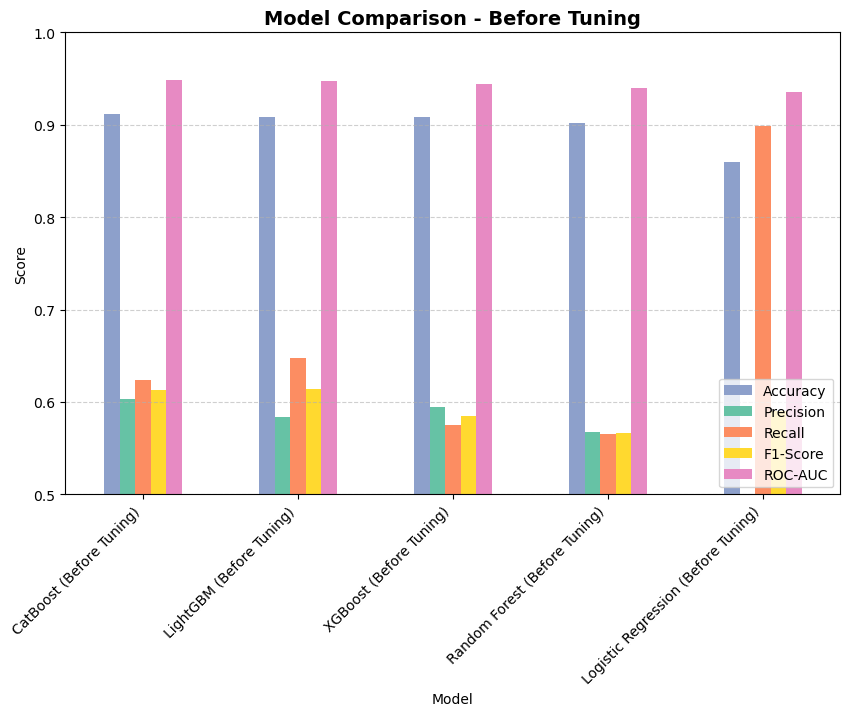

In [110]:
# Before tuning only
before_df = final_results_df[final_results_df['Model'].str.contains('Before')]
before_df.set_index('Model')[['Accuracy','Precision','Recall','F1-Score','ROC-AUC']].plot(
    kind='bar', figsize=(10,6), color=['#8da0cb', '#66c2a5', '#fc8d62', '#ffd92f', '#e78ac3']
)
plt.title("Model Comparison - Before Tuning", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0.5, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Performance Analysis (Before Tuning):

- Logistic Regression : Very high recall (0.89) but low precision (0.43).Means it correctly finds most “Yes” cases but over-predicts them (too many    false positives).Useful for identifying all potential leads but not for efficiency.

- Random Forest classification: Stable accuracy (0.90) and balanced precision–recall. Reliable and interpretable via feature importance. Slightly weaker recall compared to boosting models.

- XGBoost Cassification: balanced precision and recall (both ~0.59).AUC = 0.944 → excellent class separation. Slightly conservative — doesn’t overpredict “Yes”.

- LightGBM: Boosted recall to 0.64 while keeping good precision (0.58).AUC = 0.947 — slightly better than XGBoost.

- catBoost: Best accuracy (0.911) and strongest AUC (0.948).Balanced precision (0.60) and recall (0.63).Handles categorical–numerical interaction perfectly.

Among all models, CatBoost achieved the best overall performance with 91.1% accuracy and 0.948 ROC-AUC, showing excellent balance between recall and precision.

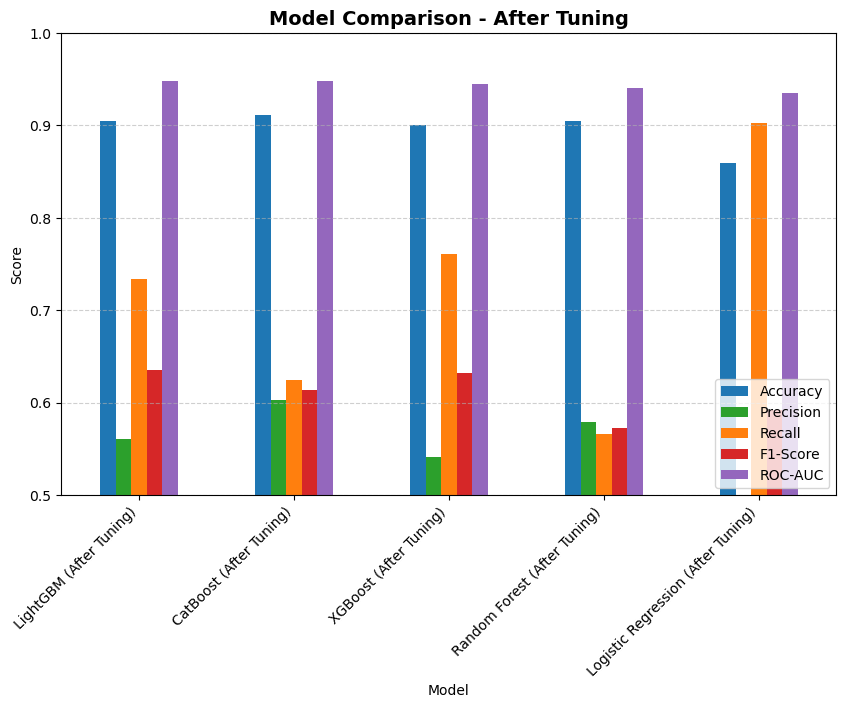

In [111]:
# After tuning only
after_df = final_results_df[final_results_df['Model'].str.contains('After')]
after_df.set_index('Model')[['Accuracy','Precision','Recall','F1-Score','ROC-AUC']].plot(
    kind='bar', figsize=(10,6), color=['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']
)
plt.title("Model Comparison - After Tuning", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0.5, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Performance Analysis (Before Tuning):

- CatBoost (After Tuning) achieved the highest ROC-AUC score (0.948) and Accuracy (0.911), showing strong predictive capability and stable generalization.
Its Precision (0.603) and Recall (0.624) demonstrate balanced performance, with the highest F1-Score (0.613) among all models.

- LightGBM (After Tuning) followed very closely with a ROC-AUC of 0.948 and Accuracy of 0.905, reflecting excellent learning efficiency and generalization similar to CatBoost.
This indicates that both boosting algorithms performed optimally after tuning.

- XGBoost (After Tuning) showed a notable improvement, achieving a ROC-AUC of 0.945 with Recall (0.760) — the highest recall among all models — suggesting it is better at identifying positive (target) cases, though with slightly lower precision.

- Random Forest (After Tuning) provided moderate performance with a ROC-AUC of 0.940, maintaining a good trade-off between Precision and Recall but not outperforming the boosting-based algorithms.

- Logistic Regression (After Tuning) remained the simplest baseline model with a ROC-AUC of 0.935, performing reasonably well but significantly lower compared to advanced ensemble methods.

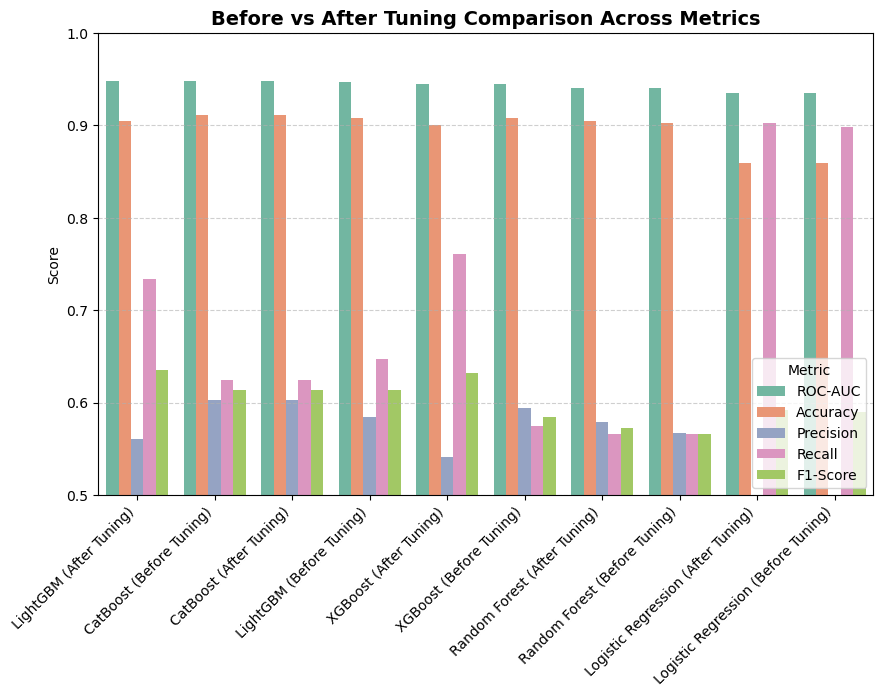

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=final_results_df.melt(id_vars='Model', value_vars=['ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']),
    x='Model', y='value', hue='variable', palette='Set2'
)
plt.title("Before vs After Tuning Comparison Across Metrics", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1)
plt.legend(title='Metric', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Observation:
After hyperparameter optimization, the CatBoost model remains the best-performing algorithm overall, achieving the highest ROC-AUC and accuracy while maintaining balanced precision and recall.
Its results validate both robustness and stability. LightGBM stands as a close second choice for scenarios requiring faster training with comparable performance.

Challengers:

- Columns like pdays had placeholder values (999) which distorted insights.
- Outliers in Numerical Features
- Dataset contained multiple categorical variables with many unique categories
- Target variable (y) was highly imbalanced (~90:10 ratio of “no” to “yes”)
- Economic indicators (euribor3m, emp.var.rate, nr.employed) showed high correlation (VIF > 30).
- Hyperparameter tuning can take a long time, especially for models like CatBoost.

Data-Driven Suggestions for the Bank Marketing Team:

Based on the exploratory data analysis and model insights, the following recommendations can help the marketing team improve customer conversion and campaign efficiency:

- Improve call quality, not just quantity:Longer calls are linked to higher subscription rates. Train agents to engage customers in meaningful, personalized conversations instead of rushing calls.

- Avoid excessive repeat contacts:Many “no” responses came from customers who were contacted multiple times. Limit re-contact attempts (e.g., up to 3–4) to avoid customer fatigue.

- Prioritize customers with previous interactions: Clients who had prior successful contact are more likely to subscribe again. Maintain and target this “warm leads” list in new campaigns.

- Reconnect with recent but unsuccessful contacts:  Customers contacted recently (low pdays) but who didn’t subscribe still show interest. Re-engage them with new offers or reminders.

- Focus campaigns during weak economic conditions: Subscriptions were higher when interest rates (euribor3m) and employment rates were lower. Plan major campaigns during such periods — customers are more open to secure investments.
- Focus on behavioral factors like call duration, previous contact, and campaign engagement instead.

- Cellular communication leads to higher conversions than telephone calls. Continue prioritizing mobile-based campaigns.

- Months like May, August, and October had higher success rates. Concentrate marketing efforts in these periods for better results.

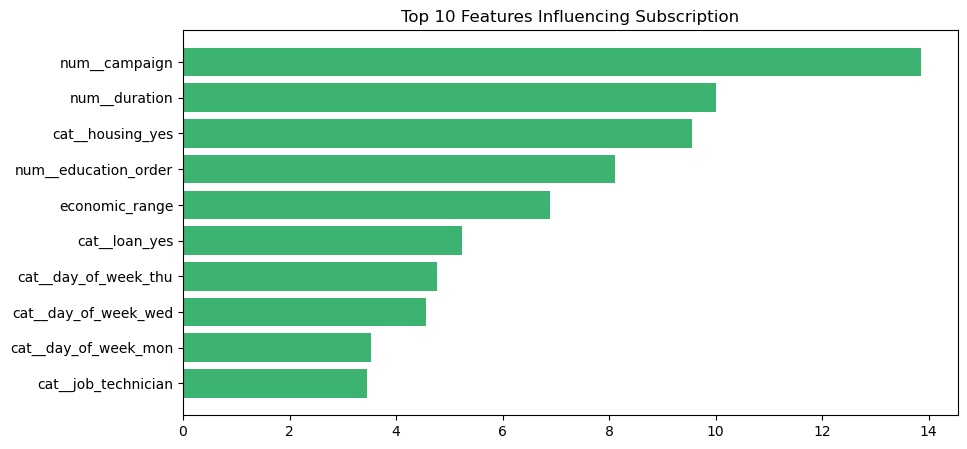

In [67]:
from catboost import Pool
import matplotlib.pyplot as plt

feature_importance = cat_model.get_feature_importance(Pool(x_train_resampled, y_train_resampled))
features = x_train_resampled.columns

imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='mediumseagreen')
plt.gca().invert_yaxis()
plt.title("Top 10 Features Influencing Subscription")
plt.show()


Limitations:
- The dataset is imbalanced, and certain features like duration may not be available before a call (can’t be used in real-time prediction).
- Economic conditions in the data represent a specific period, so periodic model retraining will be required.
- The dataset lacks key customer information such as income, spending habits, digital engagement, or risk profile ,all of which could improve   predictive power.
- No Real-Time or Sequential Analysis because the model predicts based on past aggregated data.
- As Learning only focusing on subscription limited Scope for Multi-Product.

Conclusion:
The goal of this project was to build a predictive model to help the bank’s marketing team identify customers who are most likely to subscribe to a term deposit.
Through systematic data analysis, feature engineering, and model evaluation, the project successfully delivered both business insights and high-performing predictive models.

- Key Outcomes:

    - Exploratory Data Analysis (EDA) revealed strong relationships between subscription success and features like call duration, previous contact, and economic indicators (emp.var.rate, euribor3m, nr.employed).
    - Data preprocessing handled outliers, missing values (pdays), categorical encoding, and scaling effectively.
    - SMOTE and class weighting were used to manage data imbalance between “yes” and “no” customers.
    - Multiple supervised learning models were developed and evaluated — Logistic Regression, Random Forest, XGBoost, LightGBM, and CatBoost.5️Among them, CatBoost achieved the best overall performance with:
    Accuracy: 0.911
    F1-Score (Yes): 0.613
    ROC-AUC: 0.948 making it the most reliable model for predicting potential subscribers.
- Business Impact

  - The model enables the marketing team to prioritize high-probability customers, reducing unnecessary calls and improving campaign efficiency.

  - By focusing resources on these predicted prospects, the bank can increase conversion rates and reduce marketing costs.
